# An Exploration of Peru's National Population Program

Our project started with the Livwell dataset: a sub-national database on the living conditions of women and their well-being for 52 countries. This data is compiled from surveys of women in 52 different countries over nearly three decades. Data such as women’s education level, child mortality, financial autonomy, access to plumbing and climate was gathered and compiled. Considering the scope of our data, we decided to focus on one country and contextualize the trends in the numbers with events at the time. We chose Peru, and while researching Peru, came across a government project known as the National Program for Reproductive Health and Family Planning. In effect under president Albert Fujimori from 1996 to 1998, the plan was advertised to reduce population growth but in reality was government sanctioned ethnic cleansing. Over 300,000 Peruvian women were sterilized against their will. Fujimori’s administration explicitly targeted Indigenous and rural women, and 270,000 of the women were Quechua or Aymara women. The women and their loved ones who have been affected by the forced sterilization program have still not received justice from the government of Peru. We decided to look at how this program affected fertility rates in Peru.

Our data for Peru started in 1996 with consecutive years until 2012. The National Population Program was put into effect in 1996. Our data was taken from 24 different regions in Peru, meaning we had 24 different rows for each year. Knowing what we do about how rural and Indigenous populations were targeted, we decided to group the 24 regions into Amazon, coastal and highland categories to get a more accurate picture of how the program affected women in each region. In 1990, Peru’s population was split among the regions accordingly: 53% in the coastal region, 36% in the highlands, and 11% in the Amazon regions. A majority of people who live in the Highlands speak Quechua as a first langauge. The Quechuas are a large group of Indigenous people living across South America. Quechua is an umbrella term, the only common denominator among most Quechuas is that they speak one of the Quechua languages. Regardless, the group as a whole continues to face disenfranchisement and persecution from the Peruvian government. Understanding that a majority of the Highlands is occupied by the Quechua, we knew that region would affect our statistics. Also, In terms of wealth inequities, the Highlands and Amazon region face the highest, with coastal regions like Lima receiving most of the economic benefits of governmental policies.


So let's try to visualize the regional inequities with our data before we get into the question of fertility.

### Step 1: Installing Necessary Libraries

Before starting the analysis, we install the Python libraries needed for data handling and visualization. These are:

- `pandas` for loading and manipulating data
- `matplotlib` and `seaborn` for creating visualizations

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2: Reading Our Dataset Using Pandas

In [7]:
df = pd.read_csv("Livwell Peru Clean2.csv")

### Step 3: Filtering 24 Regions by Region Type

In [8]:
df['region_type'] = df['region_type'].str.capitalize()
df = df[df['region_type'].isin(['Coastal', 'Highland', 'Amazon'])]

### Step 4: Visualizing!
- Household Living Conditions by Region Type
- General Mortality Rate Trends by Region Type and Year
- General Fertility Rate Trends by Region Type and Year

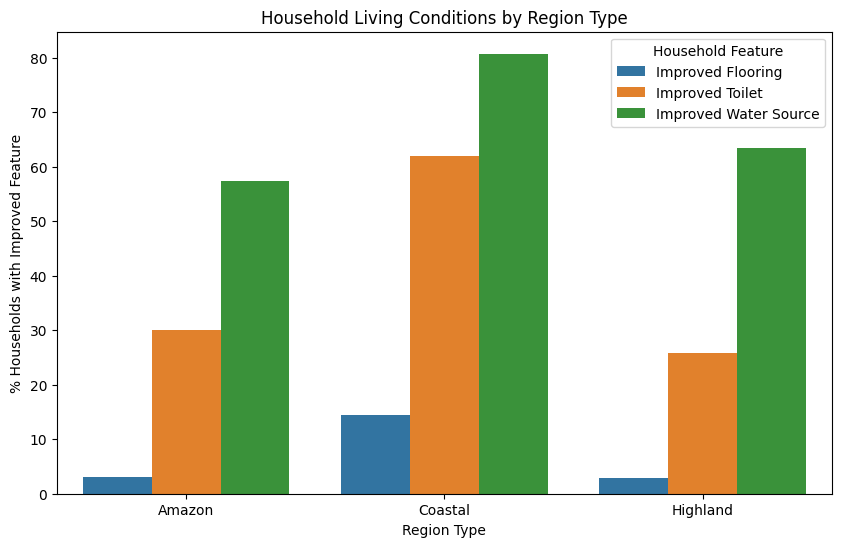

In [9]:
# Household Living Conditions by Region Type

living_cols = {
    "HH_floor_high_p": "Improved Flooring",
    "HH_toilet_high_p": "Improved Toilet",
    "HH_water_high_p": "Improved Water Source"}
living_df = df[["region_type"] + list(living_cols.keys())]
living_df = living_df.groupby("region_type").mean().reset_index()
living_df = living_df.melt(id_vars="region_type", var_name="Indicator", value_name="Percentage")
living_df["Indicator"] = living_df["Indicator"].map(living_cols)

plt.figure(figsize=(10, 6))
sns.barplot(data=living_df, x="region_type", y="Percentage", hue="Indicator")
plt.title("Household Living Conditions by Region Type")
plt.ylabel("% Households with Improved Feature")
plt.xlabel("Region Type")
plt.legend(title="Household Feature")
plt.show()

We can see that coastal regions have higher percentages of improved household features across the board, with Highland and Amazon regions being about the same. This illustrates a bit of the inequity that we discussed in our introduction.


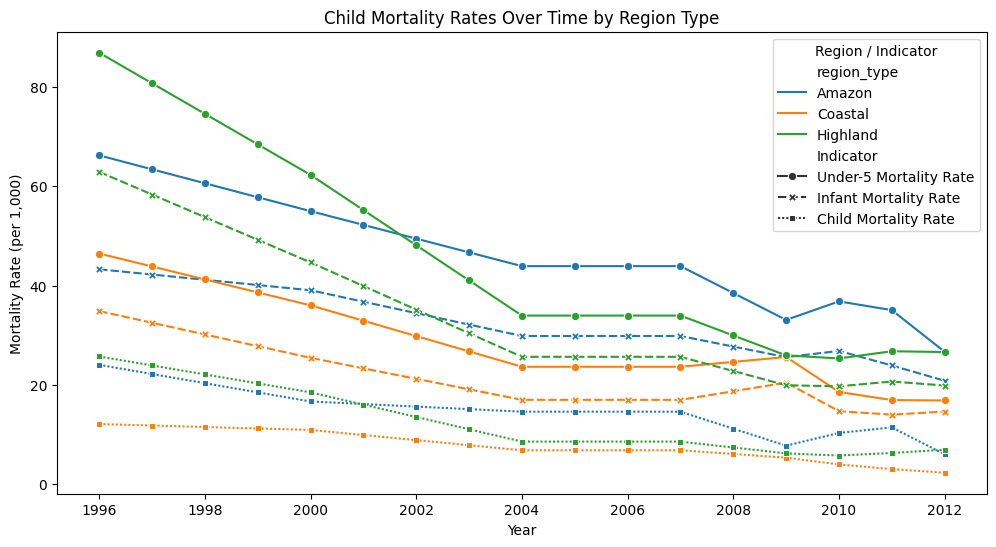

In [10]:
# Child Mortality Trends by Region Type and Year

mortality_cols = {
    "HL_U5MR": "Under-5 Mortality Rate",
    "HL_IMR": "Infant Mortality Rate",
    "HL_CMR": "Child Mortality Rate"}
mortality_df = df[["year", "region_type"] + list(mortality_cols.keys())]
mortality_df = mortality_df.melt(id_vars=["year", "region_type"], var_name="Indicator", value_name="Rate")
mortality_df["Indicator"] = mortality_df["Indicator"].map(mortality_cols)

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=mortality_df,
    x="year",
    y="Rate",
    hue="region_type",
    style="Indicator",
    markers=True,
    errorbar=None
)
plt.title("Child Mortality Rates Over Time by Region Type")
plt.ylabel("Mortality Rate (per 1,000)")
plt.xlabel("Year")
plt.legend(title="Region / Indicator")
plt.show()

Again, these child mortality rates have the Highland and Amazon regions at much higher figures than the coastal for each kind of mortality rate, with an under 5 mortality rate being distinctly high for the Highland region in the 90s.

Now, let's look at the General Fertility Rate for each region from 1996 to 2012 and try to answer our question about the impact of the National Family Planning program on women's fertility in each region.

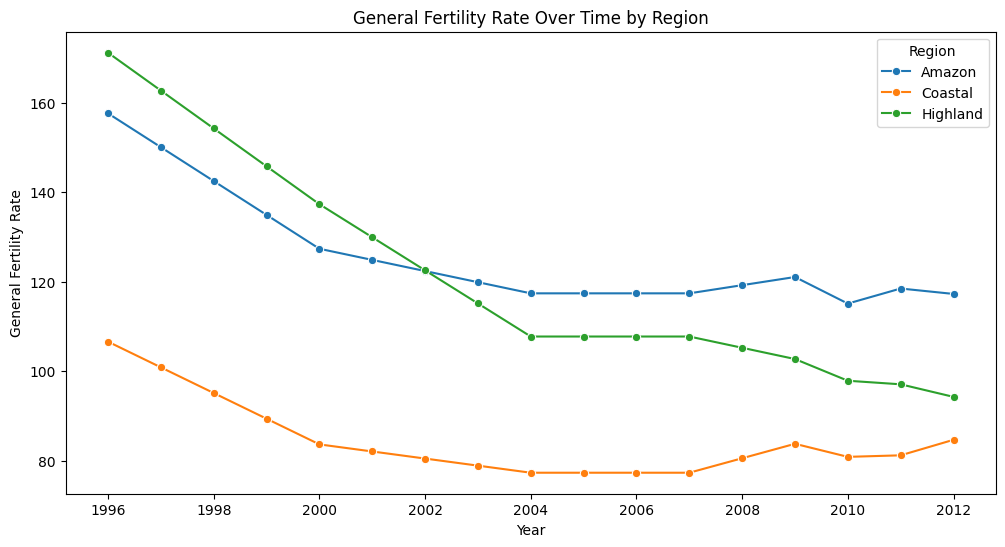

In [11]:
# General Fertility Rate Trends by Region Type and Year

df = df.dropna(subset=['FF_GFR'])

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='year', y='FF_GFR', hue='region_type', marker='o', errorbar=None)

plt.title("General Fertility Rate Over Time by Region")
plt.xlabel("Year")
plt.ylabel("General Fertility Rate")
plt.legend(title="Region")
plt.show()

When we examine the General Fertility Rate (GFR), we identify a general decline in fertility over time; however, the Highland region experienced the sharpest decline in GFR between 1996 and 2000, during the exact period the National Family Planning Program took effect. When we compare this trend against the more gradual decreases in the Amazon and Coastal regions, this confirms the inference that Fujimori's campaign disproportionately targeted Indigenous women and had measurable demographic consequences.  


Our analysis of the LivWell dataset, focusing on regional disparities in Peru from 1996 and 2012, reveals inequities in womens well-being that align closely with the country’s geographic and socioeconomic divides. We were interested in studying disparities in household features, child mortality rates, and fertility trends for women in Peru, and after learning about the National Program for Reproductive Health and Family Planning, whether our data would offer insight into the program's consequences on fertility rates over time. In other words, by categorizing the regions as coastal, amazon, and highlands, we aimed to identify both the immediate disparities during the National Program for Reproductive Health and Family Planning  program’s peak (96-98) as well as long term disparities. 

We hypothesized that highland and amazonian regions would show more signs of significant disruption to family structures and maternal health in the years immediately following the campaign. Additionally, we inferred that the effects of this campaign would persist in the form of slower improvements in women's well-being in targeted regions compared to the coastal ones. 

Our analysis of the data confirmed this. The highlands saw a disproportionately sharp decline between 1996 and 2000, consistent with reports of forced sterilizations targeting indigenous and rural women. Although this may only be part of the story, as causation cannot be established from our data alone, the alignment between the program's timeline, its targeting of rural populations, and the sudden drop in fertility serves as support to our argument that this policy had measurable and lasting consequences. 

These findings emphasize the need to utilize available public data to understand how state power, policy, and violence have been leveraged to commit human rights violations. It also serves as an opportunity to hold the countries that commit such violations accountable. Communities in Peru’s Highland and Amazon regions specifically continue carrying the legacy of abuse and trauma due to both infrastructural neglect and coercive population control campaigns. Decades later, it allows us to evaluate and ask, how is Peru bringing justice and reparations to the hundred of thousands of women who underwent dangerous and coercive sterilization?  
